## Step-by-step building of a deep neural network and using it for image classification 

In this project we will buid a Deep Neural Network (L-layers) from skratch. This project is divided into two phases.

- In first phase, we will implement all the functions required to build a deep neural network.
- In the second phase, we will use these functions to build a deep neural network for image classification.

This project is to learn -
- Non-linear units like ReLU to improve neural network model
- Build a deep neural network (with more than 1 hidden layer)
- Apply deep neural network for supervised learning and classification

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).


## 1 - Packages

Let's first import all the nescessary packages. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. 

In [138]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# np.random.seed(1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Outline of the project

To build your neural network, we will be implementing several "helper functions". These helper functions will be used to build an L-layer neural network. 

The steps involved in phase-I are -
- Initializing the parameters for an $L$-layer neural network.
- Implement the forward propagation module.
     - Completing the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - Coding the ACTIVATION function (relu/sigmoid).
     - Combining the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stacking the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and adding a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Computing the loss.
- Implementing the backward propagation module.
    - Completing the LINEAR part of a layer's backward propagation step.
    - Coding the gradient of the ACTIVATION function 
    - Combining the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally updating the parameters.

**Note** that for every forward function, there is a corresponding backward function. That is why at every step of our forward module we will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module we will then use the cache to calculate the gradients.


## 2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is little complicated because there are many weight matrices and bias vectors. When completing the `initialize_parameters_deep`, we have to make sure that our dimensions match between each layer. Below we implement initialization for an L-layer Neural Network. 

**Note**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- We shall use random initialization for the weight matrices with `np.random.randn(shape) * 0.01`.
- We shall use zeros initialization for the biases with `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. 


In [139]:

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))  
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters


In [140]:
# Test of initialize_parameters_deep(layer_dims)
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print()

#----------------------------------------------
print("Expected output:")
print("-"*50)

print("W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]" + \
      "[-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]" + \
      "[-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]" + \
      "[-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]")
print("b1 = [[0.] [0.] [0.] [0.]]")
print("W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]" + \
      "[-0.01023785 -0.00712993  0.00625245 -0.00160513]" + \
      "[-0.00768836 -0.00230031  0.00745056  0.01976111]]")
print("b2 = [[0.] [0.] [0.]]")


W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]

Expected output:
--------------------------------------------------
W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388][-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218][-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034][-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.] [0.] [0.] [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716][-0.01023785 -0.00712993  0.00625245 -0.00160513][-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.] [0.] [0.]]


## 3 - Forward propagation module

Here we will do the forward propagation module. In the below section, you will code the two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$.
- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$.
    

In [160]:
# The function linear_activation_forward() is the implementation of the forward propagation for a single layer 
# of neural netwrok

def linear_activation_forward(A_prev, W, b, activation):
    
    """
    Arguments:
    
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    cache -- a python dictionary containing (A_prev, W, b, Z, A) with same name keys;
             stored for computing the backward pass efficiently
    """
    
    cache = {}
    if activation == "sigmoid":
        
        Z = np.dot(W, A_prev) + b        
        A = 1/(1 + np.exp(-Z))          
        # cache = A_prev, W, b, Z, A
        cache["A_prev"] = A_prev
        cache["W"] = W
        cache["b"] = b
        cache["Z"] = Z
        cache["A"] = A
            
    elif activation == "relu":
                
        Z = np.dot(W, A_prev) + b        
        A = np.maximum(0, Z)
        # cache = A_prev, W, b, Z, A   
        cache["A_prev"] = A_prev
        cache["W"] = W
        cache["b"] = b
        cache["Z"] = Z
        cache["A"] = A

    return cache


In [161]:
# Test of linear_activation_forward()

def linear_forward_test_case():  
    
    np.random.seed(1)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

def linear_activation_forward_test_case():
    
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A_prev, W, b

A_prev, W, b = linear_activation_forward_test_case()

temp_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(temp_cache["A"]))

temp_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(temp_cache["A"]))
print()

#--------------------------------------------------
print("Expected output:")
print("With sigmoid: A = [[0.96890023 0.11013289]]")
print("With ReLU: A = [[3.43896131 0.        ]]")


With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]

Expected output:
With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


### L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, we will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID. We shall also keep track of the caches in the "caches" list.

In [162]:

def L_model_forward(X, parameters):
    
    """
    Implementing forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:    
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:    
    AL -- last post-activation value
    caches -- list of caches containing: every cache of linear_activation_forward()
    
    """

    caches = []
    A_prev = X
    L = len(parameters) // 2     # number of layers in the neural network
    
    # Code for [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):                
        cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation='relu')
        caches.append(cache)
        A_prev = cache["A"]
            
    # Code for LINEAR -> SIGMOID. Add "cache" to the "caches" list.    
    cache = linear_activation_forward(A_prev, parameters['W' + str(L)], parameters['b' + str(L)], activation='sigmoid')
    caches.append(cache)
    
    return caches


In [163]:
# Test of L_model_forward(X, parameters)

def L_model_forward_test_case_2hidden():   
    
    np.random.seed(6)
    X = np.random.randn(5, 4)
    W1 = np.random.randn(4, 5)
    b1 = np.random.randn(4, 1)
    W2 = np.random.randn(3, 4)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

    return X, parameters

X, parameters = L_model_forward_test_case_2hidden()
caches = L_model_forward(X, parameters)

print("AL = " + str(caches[-1]["A"]))
print("Length of caches list = " + str(len(caches)))
print()

#--------------------------------------------------
print("Expected output:")
print("-"*25)
print("AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]")
print("Length of caches list = 3")


AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3

Expected output:
-------------------------
AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


Now we have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing our predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, we can compute the cost of our predictions.

## 4 - Cost function
Next we will implement forward and backward propagation. We need to compute the cost, because we want to check if our model is actually learning. 

Computing the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [164]:
def compute_cost(AL, Y):
    """
    Implementing the cost function defined by equation (7).

    Arguments:
    
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Code to compute the loss from AL and Y.    
    cost = -1/m * (np.dot(Y, np.log(AL).T) + np.dot((1 - Y), np.log(1 - AL).T))      
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        
    return cost


In [165]:
# Test of compute_cost(AL, Y)

def compute_cost_test_case():
    
    Y = np.asarray([[1, 1, 0]])
    aL = np.array([[.8, .9, 0.4]])
    
    return Y, aL

Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))
print()

#--------------------------------------------------
print("Expected output:")
print("-"*25)
print("cost = 0.2797765635793422")


cost = 0.2797765635793422

Expected output:
-------------------------
cost = 0.2797765635793422


## 5 - Backward propagation module

Just like with forward propagation, we will implement helper functions for backpropagation. The back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

We are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)


In [166]:

def linear_activation_backward(dA, cache, activation):
    """
    Implementing the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    
    dA -- post-activation gradient for current layer l
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    
    """
    A_prev = cache["A_prev"]
    W = cache["W"]
    b = cache["b"]
    Z = cache["Z"]
    A = cache["A"]
    
    # m = A_prev.shape[1]
    m = A.shape[1]
                
    if activation == "relu":        
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)
        
    elif activation == "sigmoid":   
        s = 1 / (1 + np.exp(-Z))
        dZ = dA * s * (1-s)
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)
            
    return dA_prev, dW, db


In [169]:
# Test for linear_activation_backward(dA, cache, activation)

def linear_activation_backward_test_case():
    
    np.random.seed(2)
    dA = np.random.randn(1, 2)
    A_prev = np.random.randn(3, 2)
    W = np.random.randn(1, 3)
    b = np.random.randn(1, 1)
    Z = np.random.randn(1, 2)    
    A = np.maximum(0, Z)
    test_cache = {}
    test_cache["A_prev"] = A_prev
    test_cache["W"] = W
    test_cache["b"] = b
    test_cache["Z"] = Z
    test_cache["A"] = A
        
    return dA, test_cache

dAL, test_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, test_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, test_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
print()

#--------------------------------------------------
print("Expected output:")
print("-"*50)
print ("sigmoid:")
print ("dA_prev = [[ 0.11017994  0.01105339] [ 0.09466817  0.00949723] [-0.05743092 -0.00576154]]")
print ("dW = [[ 0.10266786  0.09778551 -0.01968084]]")
print ("db = [[-0.05729622]]")

print()
print ("relu:")
print ("dA_prev = [[ 0.44090989 -0.] [ 0.37883606 -0.]  [-0.2298228   0.]]")
print ("dW = [[ 0.44513824  0.37371418 -0.10478989]]")
print ("db = [[-0.20837892]]")


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]

Expected output:
--------------------------------------------------
sigmoid:
dA_prev = [[ 0.11017994  0.01105339] [ 0.09466817  0.00949723] [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.] [ 0.37883606 -0.]  [-0.2298228   0.]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [170]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
             
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # dAL = - np.divide(Y, AL) + np.divide((1 - Y), (1 - AL))
        
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
   
    # Loop from l = L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads


In [174]:
# Test for L_model_backward(AL, Y, caches)

def L_model_backward_test_case():

    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    # cache = A_prev, W, b, Z, A
    
    A1_prev = np.random.randn(4, 2)
    W1 = np.random.randn(3, 4)
    b1 = np.random.randn(3, 1)
    Z1 = np.random.randn(3, 2)
    A1 = np.maximum(0, Z1)
    linear_cache_activation_1 = {}
    linear_cache_activation_1["A_prev"] = A1_prev
    linear_cache_activation_1["W"] = W1
    linear_cache_activation_1["b"] = b1
    linear_cache_activation_1["Z"] = Z1
    linear_cache_activation_1["A"] = A1

    A2_prev = np.random.randn(3, 2)
    W2 = np.random.randn(1, 3)
    b2 = np.random.randn(1, 1)
    Z2 = np.random.randn(1, 2)
    A2 = np.maximum(0, Z2)
    linear_cache_activation_2 = {}
    linear_cache_activation_2["A_prev"] = A2_prev
    linear_cache_activation_2["W"] = W2
    linear_cache_activation_2["b"] = b2
    linear_cache_activation_2["Z"] = Z2
    linear_cache_activation_2["A"] = A2

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def print_grads(grads):
    print("dW1 = " + str(grads["dW1"]))
    print("db1 = " + str(grads["db1"]))
    print("dA1 = " + str(grads["dA1"]))

AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)
print()

#--------------------------------------------------
print("Expected output:")
print("-"*100)
print ("dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]" + \
       "[0. 0. 0. 0.]" + \
       "[0.05283652 0.01005865 0.01777766 0.0135308 ]]")
print("db1 = [[-0.22007063]" \
      "[ 0.]" \
      "[-0.02835349]]")
print("dA1 = [[ 0.12913162 -0.44014127]" \
      "[-0.14175655  0.48317296]" \
      "[ 0.01663708 -0.05670698]]")


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]

Expected output:
----------------------------------------------------------------------------------------------------
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167][0. 0. 0. 0.][0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063][ 0.][-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127][-0.14175655  0.48317296][ 0.01663708 -0.05670698]]


## 6 - Updating Parameters

In this section we will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.

**Note**: Updating parameters using gradient descent on every  𝑊[𝑙] and 𝑏[𝑙] for 𝑙=1,2,...,𝐿


In [175]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2   # number of layers in the neural network

    # Update rule for each parameter    
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters


In [176]:
# Test for update_parameters(parameters, grads, learning_rate)

def update_parameters_test_case():

    np.random.seed(2)
    W1 = np.random.randn(3, 4)
    b1 = np.random.randn(3, 1)
    W2 = np.random.randn(1, 3)
    b2 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    np.random.seed(3)
    dW1 = np.random.randn(3, 4)
    db1 = np.random.randn(3, 1)
    dW2 = np.random.randn(1, 3)
    db2 = np.random.randn(1, 1)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return parameters, grads

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))
print()

#--------------------------------------------------
print("Expected output:")
print("-"*100)
print("W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]" \
      "[-1.76569676 -0.80627147  0.51115557 -1.18258802]" \
      "[-1.0535704  -0.86128581  0.68284052  2.20374577]]")
print("b1 = [[-0.04659241]" \
      "[-1.28888275]" \
      "[ 0.53405496]]")
print("W2 = [[-0.55569196  0.0354055   1.32964895]]")
print("b2 = [[-0.84610769]]")


W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]

Expected output:
----------------------------------------------------------------------------------------------------
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008][-1.76569676 -0.80627147  0.51115557 -1.18258802][-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241][-1.28888275][ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


Congrats the first phase is done. We have implemented all the functions required for building a deep neural network! In the next phase we will put all the above code together to build an L-layer neural network. We will in fact use these models to classify cat vs non-cat images!


### Deep Neural Network for Image Classification: Application

In phase 2 we will use the functions we had implemented above, and apply it to cat vs non-cat classification.

## 7 - Dataset

We will use the "Cat vs non-Cat". 

**Problem Statement**: We are given here a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

In [177]:
# Let's get more familiar with the dataset. Loading the data by running the cell below.

def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


y = 0. It's a non-cat picture.


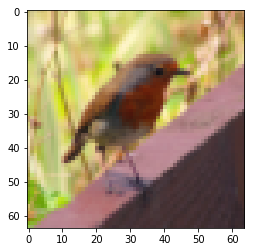

In [178]:
# The following code will show you an image in the dataset
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


In [179]:
# Explore the dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [180]:
# Reshaping the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardizing the data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# 8 - Architecture of the model
Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

We will build an L-layer deep neural network model. The architecture of the model is -

- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then we add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, we take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, we take the sigmoid of the final linear unit. If it is greater than 0.5, we classify it to be a cat.

#### General methodology

We will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels.

## 9 - L-layer Neural Network

Using the helper functions we have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions we need and their inputs are:

def initialize_parameters_deep(layers_dims):    
    return parameters

def L_model_forward(X, parameters):    
    return AL, caches

def compute_cost(AL, Y):    
    return cost

def L_model_backward(AL, Y, caches):    
    return grads

def update_parameters(parameters, grads, learning_rate):    
    return parameters


In [181]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model


In [182]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    
    parameters -- parameters learnt by the model. They can then be used to predict.
    
    """

    costs = []         # keep track of cost
    
    # Parameters initialization.    
    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID     
        caches = L_model_forward(X, parameters)
        
        AL = caches[-1]["A"]
                
        # Computing cost        
        cost = compute_cost(AL, Y)
           
        # Backward propagation        
        grads = L_model_backward(AL, Y, caches)
         
        # Updating parameters        
        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


We will now train the model as a 4-layer neural network. The cost should decrease on every iteration.

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458


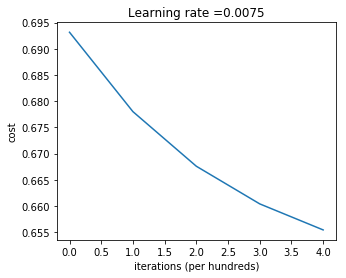

Accuracy: 0.34


In [183]:
# Predicting on test dataset
param = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 500, print_cost=True)

def predict(X, y, parameters):
    
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:    
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:    
    p -- predictions for the given dataset X
    
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    # caches = tuple(A_prev, W, b, Z, A)
    caches = L_model_forward(X, parameters)
    probas = caches[-1]["A"]
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(round(np.sum((p == y)/m), 2)))
        
    return p

pred_test = predict(test_x, test_y, param)


##  10 Results Analysis

Let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images.

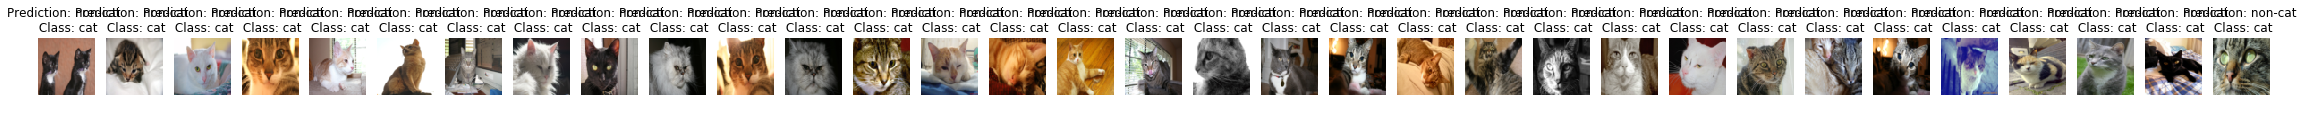

In [184]:
def print_mislabeled_images(classes, X, y, p):
    
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

print_mislabeled_images(classes, test_x, test_y, pred_test)
